In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [6]:
reviews = []

stars = []

date= []

country = []


In [7]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    
    for item in soup.find_all("time"):
        date.append(item.text)
        
    
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 31
Error on page 32
Error on page 32
Error on page 35
Error on page 35


In [8]:
len(reviews)

3500

In [9]:
len(country)

3500

In [10]:
stars= stars[:3500]

In [12]:
data = pd.DataFrame({"reviews":reviews, "stars":stars ,"date":date ,"country":country})
data.head()

,reviews,stars,date,country
0,Not Verified | BA is not treating its premium ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,6th July 2023,United Kingdom
1,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa
2,✅ Trip Verified | We arrived at Heathrow at 0...,1,5th July 2023,United Kingdom
3,✅ Trip Verified | Original flight was cancell...,1,4th July 2023,Greece
4,Not Verified | Airport check in was functiona...,3,3rd July 2023,Italy


In [13]:
data.shape

(3500, 4)

In [14]:
import os 

In [15]:
cwd = os.getcwd()
data.to_csv(cwd+ "BA_reviews.csv")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\hpBA_reviews.csv'

In [16]:
import os
cwd = os.getcwd()
file_path = os.path.join(cwd, "BA_reviews.csv")
data.to_csv(file_path)


In [17]:
os.getcwd()

'C:\\Users\\hp'

In [18]:
data

,reviews,stars,date,country
0,Not Verified | BA is not treating its premium ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,6th July 2023,United Kingdom
1,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa
2,✅ Trip Verified | We arrived at Heathrow at 0...,1,5th July 2023,United Kingdom
3,✅ Trip Verified | Original flight was cancell...,1,4th July 2023,Greece
4,Not Verified | Airport check in was functiona...,3,3rd July 2023,Italy
...,...,...,...,...
3495,BA 213 LHR to Boston. T5 was very busy but che...,5,12th June 2014,United Kingdom
3496,Flew World Traveller Plus for the first time. ...,5,12th June 2014,Canada
3497,Glasgow to LHR on a completely full flight. Th...,7,12th June 2014,United Kingdom
3498,The outward trip Manchester - Heathrow - Milan...,5,10th June 2014,United Kingdom


In [19]:
import re
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
data['verified'] = data.reviews.str.contains("Trip Verified")
data['verified']

0       False
1        True
2        True
3        True
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [26]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [29]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

lemma = WordNetLemmatizer()

reviews_data = data.reviews.str.strip("✅ Trip Verified |")

corpus = []

for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]', ' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)


In [31]:
data['corpus'] = corpus

In [32]:
data.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | BA is not treating its premium ...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,6th July 2023,United Kingdom,False,verified ba treating premium economy passenger...
1,✅ Trip Verified | 24 hours before our departu...,4,5th July 2023,South Africa,True,hour departure ba cape town heathrow thursday ...
2,✅ Trip Verified | We arrived at Heathrow at 0...,1,5th July 2023,United Kingdom,True,arrived heathrow find flight ibiza cancelled b...
3,✅ Trip Verified | Original flight was cancell...,1,4th July 2023,Greece,True,original flight cancelled explanation represen...
4,Not Verified | Airport check in was functiona...,3,3rd July 2023,Italy,False,verified airport check functionary little warm...


In [35]:
data.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [36]:
data.date = pd.to_datetime(data.date)

In [37]:
data.date.head()

0   2023-07-06
1   2023-07-05
2   2023-07-05
3   2023-07-04
4   2023-07-03
Name: date, dtype: datetime64[ns]

In [38]:
data.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '4', '1', '3', '10', '2', '7',
       '9', '5', '8', '6', 'None'], dtype=object)

In [39]:
data.stars = data.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [40]:
data.stars.value_counts()

1       796
2       397
3       393
8       346
10      301
7       299
9       294
5       254
4       239
6       176
None      5
Name: stars, dtype: int64

In [41]:
data.drop(data[data.stars =="None"].index, axis=0,inplace= True)

In [43]:
data.stars.unique()

array(['5', '4', '1', '3', '10', '2', '7', '9', '8', '6'], dtype=object)

In [44]:
data.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3495
dtype: int64

In [46]:
data.country.isnull().value_counts()

False    3495
Name: country, dtype: int64

In [47]:
data.drop(data[data.country.isnull() == True].index,axis=0,inplace=True)

In [48]:
data.shape

(3495, 6)

In [49]:
data.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,Not Verified | BA is not treating its premium ...,5,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...
1,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...
2,✅ Trip Verified | We arrived at Heathrow at 0...,1,2023-07-05,United Kingdom,True,arrived heathrow find flight ibiza cancelled b...
3,✅ Trip Verified | Original flight was cancell...,1,2023-07-04,Greece,True,original flight cancelled explanation represen...
4,Not Verified | Airport check in was functiona...,3,2023-07-03,Italy,False,verified airport check functionary little warm...
...,...,...,...,...,...,...
3490,BA 213 LHR to Boston. T5 was very busy but che...,5,2014-06-12,United Kingdom,False,ba lhr boston busy check fast efficient flight...
3491,Flew World Traveller Plus for the first time. ...,5,2014-06-12,Canada,False,flew world traveller plus first time trip lhr ...
3492,Glasgow to LHR on a completely full flight. Th...,7,2014-06-12,United Kingdom,False,glasgow lhr completely full flight crew amazin...
3493,The outward trip Manchester - Heathrow - Milan...,5,2014-06-10,United Kingdom,False,outward trip manchester heathrow milan fine ev...


# # Exploratory data analysis

In [51]:
import plotly.express as px
import datetime as dt
from wordcloud import WordCloud, STOPWORDS

In [52]:
data

,reviews,stars,date,country,verified,corpus
0,Not Verified | BA is not treating its premium ...,5,2023-07-06,United Kingdom,False,verified ba treating premium economy passenger...
1,✅ Trip Verified | 24 hours before our departu...,4,2023-07-05,South Africa,True,hour departure ba cape town heathrow thursday ...
2,✅ Trip Verified | We arrived at Heathrow at 0...,1,2023-07-05,United Kingdom,True,arrived heathrow find flight ibiza cancelled b...
3,✅ Trip Verified | Original flight was cancell...,1,2023-07-04,Greece,True,original flight cancelled explanation represen...
4,Not Verified | Airport check in was functiona...,3,2023-07-03,Italy,False,verified airport check functionary little warm...
...,...,...,...,...,...,...
3495,BA 213 LHR to Boston. T5 was very busy but che...,5,2014-06-12,United Kingdom,False,ba lhr boston busy check fast efficient flight...
3496,Flew World Traveller Plus for the first time. ...,5,2014-06-12,Canada,False,flew world traveller plus first time trip lhr ...
3497,Glasgow to LHR on a completely full flight. Th...,7,2014-06-12,United Kingdom,False,glasgow lhr completely full flight crew amazin...
3498,The outward trip Manchester - Heathrow - Milan...,5,2014-06-10,United Kingdom,False,outward trip manchester heathrow milan fine ev...


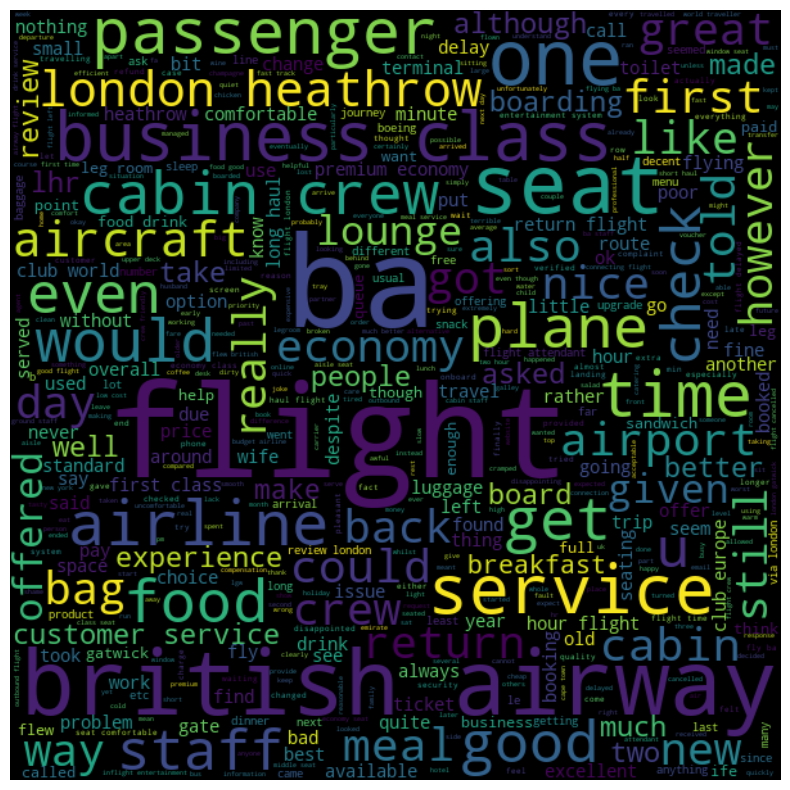

In [60]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud , STOPWORDS

reviews=" ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words("english"))

WordCloud = WordCloud(height=600,width=600,max_font_size=100,max_words=500,stopwords=stopwords).generate(reviews)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

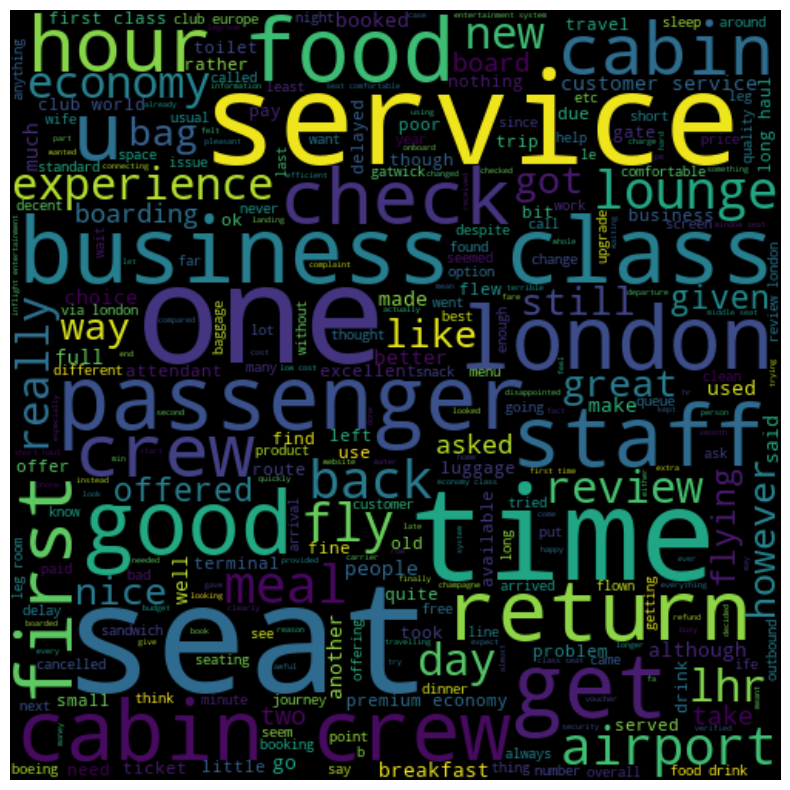

In [64]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [66]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Set a column 'Polarity' with all 0 values initially
data['polarity'] = 0

for i in range(len(data)):
    if i in data.index:
        sent = TextBlob(data.loc[i, 'corpus'])
        polarity = sent.sentiment.polarity
        subjectivity = sent.sentiment.subjectivity
        data.loc[i, 'polarity'] = polarity


In [73]:
print(f"{data[(data['polarity'] >-0.2) & (data['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{data[(data['polarity'] >-0.1) & (data['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2363 number of reviews between -0.2 and 0.2 polarity score
1375 number of reviews between -0.1 and 0.1 polarity score


In [76]:
pip install nltk(SentimentIntensityAnalyzer)

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'nltk(SentimentIntensityAnalyzer)'


In [80]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
data['label'] = 0
    
for i in range(len(data.corpus)):
    
    score = vds.polarity_scores(data.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        data['label'][i] = 1
        #print("1st")
    elif score < 0:
        data['label'][i] = -1
        #print("2nd")
    else:
        data['label'][i] = 0

C:\Users\hp\AppData\Local\Temp\ipykernel_15432\508238802.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][i] = 1
C:\Users\hp\AppData\Local\Temp\ipykernel_15432\508238802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][i] = -1
C:\Users\hp\AppData\Local\Temp\ipykernel_15432\508238802.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][i] = 0


KeyError: 3053

In [78]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [81]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

vds = SentimentIntensityAnalyzer()

# Set a column 'label' with all 0 values initially
data['label'] = 0

for i in range(len(data)):
    if i in data.index:
        score = vds.polarity_scores(data.loc[i, 'corpus'])['compound']
        if score > 0.2:
            data.loc[i, 'label'] = 1
        elif score < 0:
            data.loc[i, 'label'] = -1
        else:
            data.loc[i, 'label'] = 0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [82]:
data.label.value_counts()


 1    2245
-1    1126
 0     124
Name: label, dtype: int64

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

#create an object of CountVectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(data.corpus).toarray()
tf_feature_names = vect.get_feature_names()


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [87]:
!pip install --upgrade scikit-learn


     ---------------------------------------- 9.3/9.3 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hp\\Anaconda3\\new\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [93]:
from sklearn.feature_extraction.text import CountVectorizer

#create an object of CountVectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(data.corpus).toarray()
tf_feature_names = vect.get_feature_names()


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [94]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
data_topic =pd.DataFrame(topic_dict)

ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\hp\anaconda3\new\lib\site-packages\sklearn\base.py)

In [92]:

!pip install scikit-learn
